In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
plt.rcParams['figure.figsize'] = [20, 10]

In [36]:
def read_log(fname, minl):
    file = open(fname, 'r')
    x = []
    baseline, tdnn, tdsnn = [], [], []
    next(file)
    for line in file.readlines()[:minl]:
        it,current,target,random_prediction,tdnn_prediction,tdsnn_prediction,tdnn_tl = line.replace('\n','').split(',')
        x.append(float(it))
        baseline.append(float(target==random_prediction))
        tdnn.append(float(target==tdnn_prediction))
        tdsnn.append(float(target==tdsnn_prediction))
    return x, baseline, tdnn, tdsnn

In [37]:
def moving_average(a, n):
    moving_average = []
    for i in range(len(a)):
        start = max(0, i - n)
        values = a[start:i+1]
        moving_average.append(np.sum(values) / float(len(values)))
    return np.array(moving_average)

In [38]:
logs = [i for i in os.listdir('.') if '.out' in i]
minl = float('inf')
for log in logs:
    file = open(log, 'r')
    minl = min(minl, len(file.readlines())-2)

/home/sharathramku/.local/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sharathramku/.local/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x, y, and format string must not be None

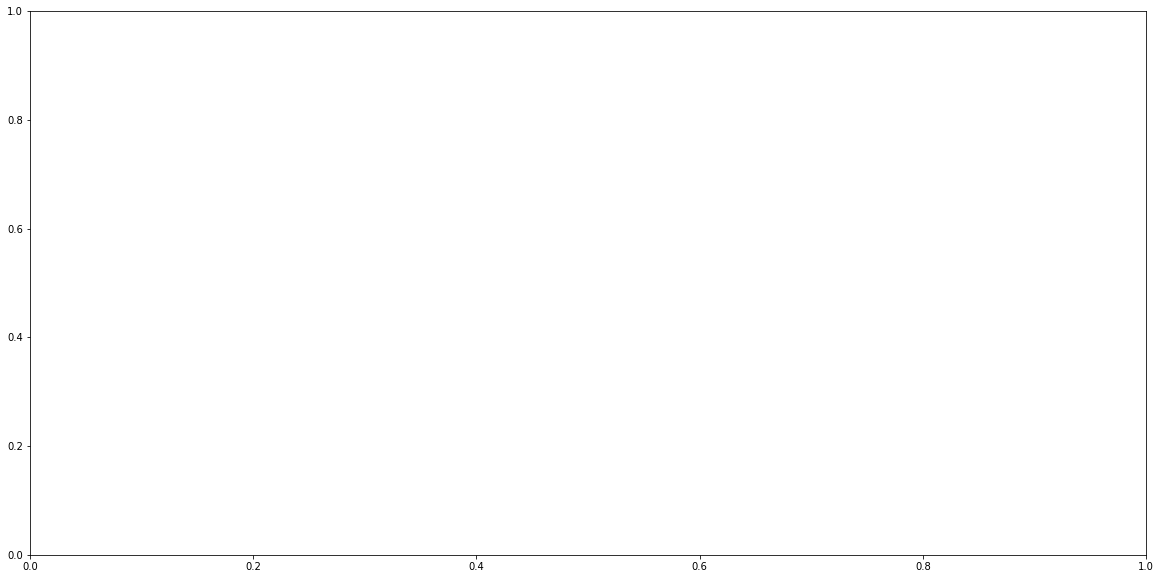

In [39]:
baseline_acc, tdnn_acc, tdsnn_acc = [], [], []
x = None
for log in logs:
    x, baseline, tdnn, tdsnn = read_log(log, minl)
    baseline_acc.append(moving_average(baseline, min(len(baseline), 100)))
    tdnn_acc.append(moving_average(tdnn, min(len(tdnn), 100)))
    tdsnn_acc.append(moving_average(tdsnn, min(len(tdsnn), 100)))
    
plt.plot(x, np.mean(baseline_acc, axis=0), label='Random', linewidth=1, color='black')
plt.fill_between(x, (np.mean(baseline_acc, axis=0)+np.std(baseline_acc, axis=0)), (np.mean(baseline_acc, axis=0)-np.std(baseline_acc, axis=0)), color=(0.5,0,0.5,0.1))


plt.plot(x, np.mean(tdnn_acc, axis=0), label='TDNN', linewidth=1, color='green')
plt.fill_between(x, (np.mean(tdnn_acc, axis=0)+np.std(tdnn_acc, axis=0)), (np.mean(tdnn_acc, axis=0)-np.std(tdnn_acc, axis=0)), color=(0.5,0,0.5,0.1))


plt.plot(x, np.mean(tdsnn_acc, axis=0), label='TDSNN', linewidth=1, color='orange')
plt.fill_between(x, (np.mean(tdsnn_acc, axis=0)+np.std(tdsnn_acc, axis=0)), (np.mean(tdsnn_acc, axis=0)-np.std(tdsnn_acc, axis=0)), color=(0.5,0,0.5,0.1))

plt.plot([10000, 10000], [0, 1], linewidth=5, color='black')
plt.ylim(0, 1.0)
plt.xlim(0, 20000)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.arange(0, 20001, 1000))
plt.title('Noisy Time-Series Prediction Task ')
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Elements Seen')
plt.grid()
plt.legend(loc="lower right")
plt.savefig('tdnn.pdf', dpi=100)